<a href="https://colab.research.google.com/github/Pratichhya/ubs_course/blob/main/Bayesian_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Linear Regression

Lets now focus on Bayesian Linear Regression for which the objective consists in determining the relationship between some response variable ${\bf Y}$ and a set of $D$ predictor variables ${\bf X}=(x_1,\ldots,x_D)$ 
* Most common assumption $\rightsquigarrow$ Relation through some deterministic function $f$ and some additive (zero-mean) random error component $\epsilon$
  $${\bf Y}=f({\bf X})+{\bf \epsilon}$$
* In most situations the predictor variables, ${\bf X}$ are assumed to be observed without error so they are not considered as random
  $$\Rightarrow f({\bf X})=\mathbb{E}\left[ {\bf Y} |{\bf X}={\bf x} \right]$$
* Our aim is to determine $f(\cdot)$  so that we can uncover the true relationship between the response ${\bf y}^*$ a at predictor location ${\bf x}^*$ given by ${\bf y}^*=f({\bf x}^*)$<br/>
  <i>(generally only interested in estimating $f$ over some range of plausible predictor values)</i>
* The true regression function is unknown and we have no way of determining its analytic form exactly, even if one actually exists $\Rightarrow$ we must content ourselves with finding approx. to it which are close to the truth by making use of the observed dataset ${\cal D}=\left\{{\bf x}^{(i)},{\bf y}^{(i)}\right\}_{i=1}^N$
* A flexible choice consists in using models using \HIm{basis functions}:
    $$f({\bf x})\approx\sum_{i=1}^k \beta_i {\bf B}_i ({\bf x})$$
    where ${\bf \beta}=(\beta_1,\ldots,\beta_k)^T$ is the set of coefficients corresponding to basis functions ${\bf B}=({\bf B}_1,\ldots,{\bf B}_k)$. Basis functions are nonlinear transformations of the data vector ${\bf x}$ - some examples include: polynomial functions, radial basis functions, etc.
    


Lets assume that we want to model our $N$ data points ${\cal D}=\left\{{\bf x}^{(i)},{\bf y}^{(i)}\right\}_{i=1}^N$ as, $\text{for } j=1,\ldots,N$:
$${\bf y}^{(j)}=\sum_{i=1}^k \beta_i {\bf B}_i ({\bf x}^{(j)})+ \epsilon^{(j)} $$
where $\epsilon^{(j)}\sim {\cal N}({\bf 0}, \sigma^2 {\bf I})$ and for some specific choice of basis functions $\Rightarrow$ this is our choice of model.

In a matrix form, the complete set of observations can be written as follows:
    
  $${{\bf y}}={\bf B} {\bf \beta}+{ \epsilon}$$
where for univariate input (${x}^{(i)}$) and outputs (${y}^{(i)}$), we have

$${{\bf y}}=\begin{bmatrix}y_1\\\vdots\\y_N\end{bmatrix}$$
$${\bf \beta}=\begin{bmatrix}\beta_1\\\vdots\\\beta_k\end{bmatrix}$$
and

$${\bf B}=\begin{bmatrix}B_1(x_1)& B_2(x_1) & \cdots &  B_k(x_1) \\
                          \vdots & \ddots & & \vdots  \\
                          B_1(x_N) & B_2(x_N) & \cdots & B_k(x_N) 
                          \end{bmatrix}$$



## Likelihood function

Let us consider that the regression will be performed by choosing the polynomial function as basis functions, i.e. $B_n(x)=x^{n-1}$. As a consequence the matrix ${\bf B}$ is given by:

$${\bf B}=\begin{bmatrix}1& x_1 & \cdots &  x_1^{k-1} \\
                          \vdots & \ddots & & \vdots  \\
                          1 & x_N & \cdots & x_N^{k-1} 
                          \end{bmatrix}$$

Moreover, the error term vector $\epsilon$ in the model is assumed to follows a <a href="https://en.wikipedia.org/wiki/Multivariate_normal_distribution" target="_blank">multivariate normal distribution</a> with (**known and fixed**) covariance matrix $\Sigma_y(=\sigma^2 {\bf I})$. The likelihood function is therefore defined as follows:

\begin{align}
\begin{split}
p({\bf y}|{\bf \beta},{\bf x})&={\cal N}({\bf y};{\bf B}\beta,\Sigma_y)\\
&=\frac{1}{(2\pi)^{N/2} |\Sigma_y|^{1/2}}\exp\left(-\frac{1}{2}({\bf y}-{\bf B}\beta)^T \Sigma_y^{-1} ({\bf y}-{\bf B}\beta) \right)
\end{split}
\end{align}
where $|\Sigma_y|$ is the determinant of the matrix $\Sigma_y$.

## Prior distributions on unknown parameters $\beta$

A multivariate normal distribution will be chosen as prior distribution for the unknown random vector $\beta$. Different choices can be made but the Gaussian assumption is the one typically used in this setting due to the nice identities we have with this distribution - to be more precise in the vocabulary, we use the conjugacy property of this distribution under the defined likelihood. 

The prior distribution for the unknown parameters is then defined as:
\begin{align}
\begin{split}
p({\bf \beta})&={\cal N}({\bf \beta};{\bf \mu_\beta},\Sigma_\beta)\\
&=\frac{1}{(2\pi)^{k/2} |\Sigma_\beta|^{1/2}}\exp\left(-\frac{1}{2}(\beta- \mu_\beta)^T \Sigma_\beta^{-1} (\beta- \mu_\beta) \right)
\end{split}
\end{align}
where $\mu_\beta$ and $\Sigma_\beta$ are the mean vector and covariance matrix of the prior on $\beta$. Without any specific a priori knowledge on $\beta$, one typically chooses zero mean $\mu_\beta={\bf 0}$ and independent components with the same variance $\Sigma_\beta=\sigma_\beta^2{\bf I}$ 

## Numerical Examples

In this section, the regression will be performed by assuming
* independent training samples: $\Sigma_y=\sigma_y^2 {\bf I}$ in the likelihood,
* zero mean and independent regression coefficients $\beta_i$: $\mu_\beta={\bf 0}$ and $\Sigma_\beta=\sigma_\beta^2{\bf I}$ in the prior of $\beta$ 

In [ ]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats



def plot_posterior(mean, variance,indexComponent, ax=None):
    x = np.linspace(-20, 20, 10000)
    y = scipy.stats.norm.pdf(x, mean, np.sqrt(variance))
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\beta_{}$".format(indexComponent+1), fontsize=20)
    ax.set_ylabel(r"$P(\beta_{}|\cal D)$".format(indexComponent+1), fontsize=20)
    ax.set_title(r"Marginal Posterior of $\beta_{}$".format(indexComponent+1), fontsize=20);


In [ ]:
# Definition of the true function

def TrueFunc(x):
    return np.sin(4.5*x)


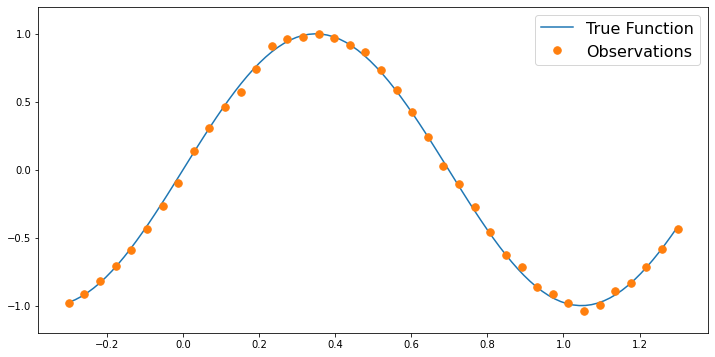

In [ ]:
# Generation of the samples that will constitute our training set
xMin=-0.3
xMax=1.3

numObs = 40   
trueNoiseStd = 2e-2
obsLocs = np.linspace(xMin,xMax,numObs) # choose data points x equally spaced on [xMin;xMax]   

obsData = TrueFunc(obsLocs) + trueNoiseStd*np.random.randn(numObs)      #applied basis function and added noise
modelNoiseStd = trueNoiseStd
noiseCov = modelNoiseStd * np.eye(numObs) # Covariance matrix of the observations     


numPlot = 100

plotx = np.linspace(xMin, xMax, numPlot)

plt.figure(figsize=(12,6))
plt.plot(plotx, TrueFunc(plotx),label='True Function')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Observations')

plt.ylim([-1.2,1.2])
plt.legend(fontsize=16)

In [ ]:
# Designing the matrix B containing the basis functions on the training set
polyOrder = 6 # number of polynoms/regression coefficients

B = np.ones((numObs,polyOrder))           #basis function for observations is created as a matrix of polyorder
for p in range(1,polyOrder): 
    B[:,p] = np.power(obsLocs, p)


In [ ]:
# Setting the values for the prior distribution on the regression coefficients

priorMean = np.zeros(polyOrder)
priorCov = (100)*np.eye(polyOrder)

### Predictive Prior

Lets talk a look at the predictive prior - what will be our prediction without any training data.

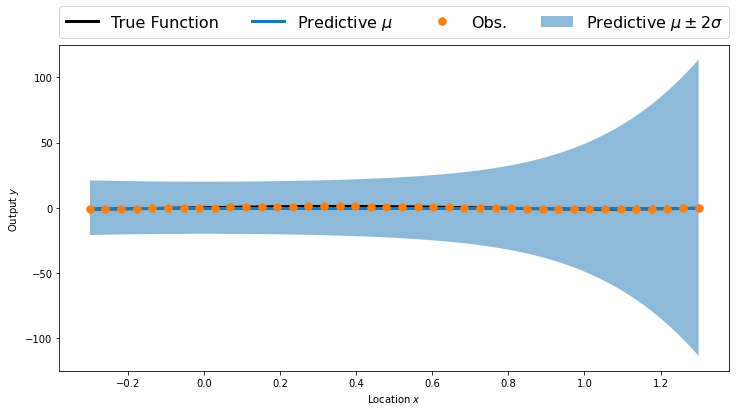

In [ ]:
predB = np.ones((numPlot,polyOrder))
for p in range(1,polyOrder): 
    predB[:,p] = np.power(plotx, p)         #basis function for test set
    
predMean = np.dot(predB, priorMean)
predCov = np.dot(predB, np.dot(priorCov, predB.T))

predStd = np.sqrt(np.diag(predCov))


plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx
         , TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 1 - Comment these results.<br/> -------------------------- </span> 
Here, we can visualize the range in which we can get the computed value from the observed data. True function is given by the basis function that was used for the transformation of the input data point and since we used sin function so the curve should be ranging from -1 to 1. And the predictive mean given a straight line parallel to 0 as initially prior mean is a zero matrix. And the predicted range for the computed value is shown in the shades of blue which can be referred to as covariance for a value whose value can be possibly in this range.

As we knowe for the value of parameter given by $P(beta) $~$ N[mean,std]$

When mean is taken as 0 given by the dot product between the prior mean and basis/transformation function for testset the based on prior mean and prior covariance we get predicted which instead of being fixed value like in case of simple linear regression, it ranges of confidence interval i.e. $$Predictive = mean \pm\ 2 \sigma\ $$ for the given set of data.


### Posterior Distribution

Lets now compute the posterior distribution - as seen in the lecture, due to the conjugacy property of the Gaussian assumption of both the prior and the likelihood, the posterior distribution of the parameters $\beta$, $p(\beta|{\bf y},{\bf x})$ will also be a multivariate normal distribution, i.e.

$$p(\beta|\underbrace{{\bf y},{\bf x}}_{\cal D})={\cal N}({\bf \beta};{\bf \tilde{\mu}_\beta},\tilde{\Sigma}_\beta)$$
where
\begin{align}
\begin{split}
\tilde{\mu}_\beta & = {\mu}_\beta + {\Sigma}_\beta {\bf B}^T [{\bf B}{\Sigma}_\beta {\bf B}^T + {\Sigma}_y]^{-1} ({\bf y}-{\bf B}{\mu}_\beta) \\
\tilde{\Sigma}_\beta &= \left({\bf I}-{\Sigma}_\beta {\bf B}^T [{\bf B}{\Sigma}_\beta {\bf B}^T + {\Sigma}_y]^{-1} {\bf B}\right) {\Sigma}_\beta
\end{split}
\end{align}

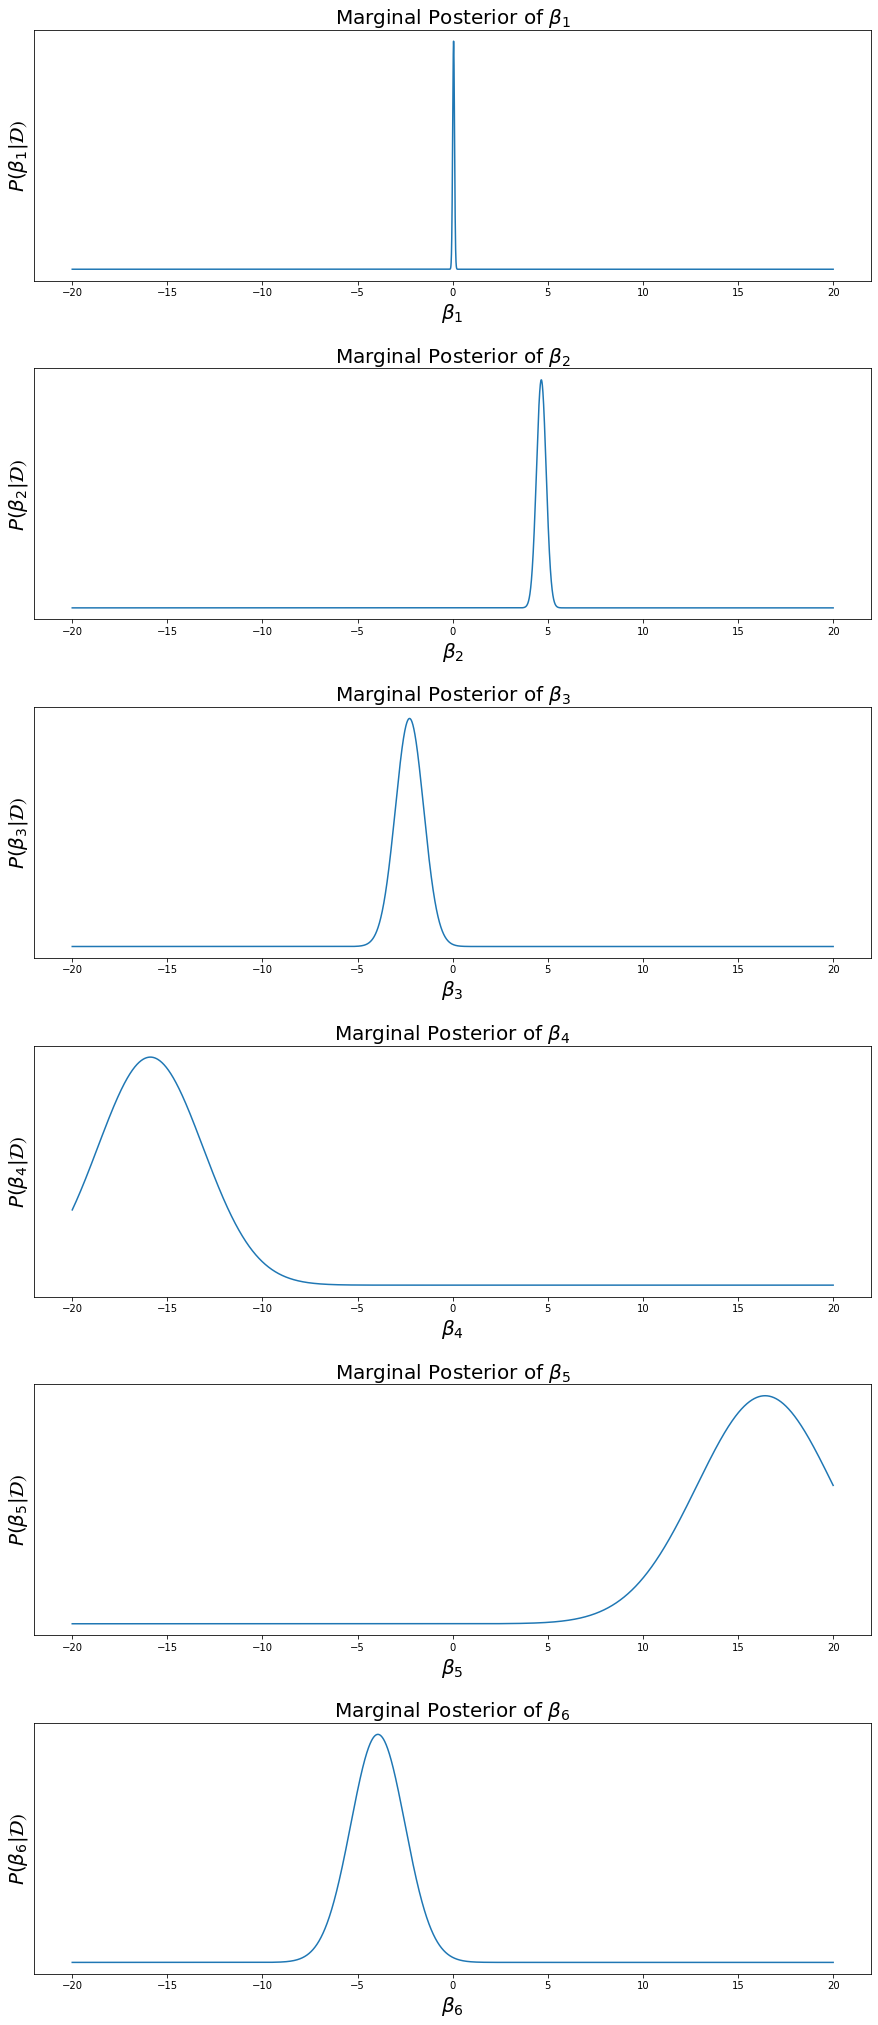

In [ ]:
predCov=np.dot(np.dot(B,priorCov),B.T)+noiseCov
predMean=np.dot(B,priorMean)

ProductK=np.dot(np.dot(priorCov,B.T),np.linalg.inv(predCov))

postMean=priorMean+np.dot(ProductK,(obsData-predMean))
postCov=np.dot((np.eye(polyOrder)-np.dot(ProductK,B)),priorCov)
#print(postMean)
#print(postCov)


BetaGrid = np.linspace(-10, 10, 1000)


fig, axes = plt.subplots(nrows=polyOrder,figsize=(15,15))
fig.tight_layout()#(wspace = 0.2)
for i in range(polyOrder):
    plot_posterior(postMean[i],postCov[i,i],i, ax=axes[i])
    axes[i].set_yticks([])
    

plt.subplots_adjust(left=0.125,
                    bottom=0, 
                    right=0.9, 
                    top=1.8, 
                    wspace=10, 
                    hspace=0.35)    

plt.show()


<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 2 - Comment these results.<br/> -------------------------- </span> 

Plot depicts the posterior distribution for a given $\beta$, where posterior is obtained by combining prior and likelihood.
In this case, we're plotting the pdf based on different predictive mean and covariance values that were calculated using prior mean and prior covariance. Under different priors, posterior beliefs has different level of confidence.

According to my understanding for the graph obtained above, when plotting continous data for polyorder ranging upto 6, the range at which posterior value is obtain can vary. When polynomial order is set as 1 the posterior distribution for expected value is seen to be very pointed and have very less variance (i.e I am more confident for my observation to be within that curve) whereas, as the order is increased then there is increasing range of variance for the expected value as seen in graph for $\beta4$ and $\beta5$. 
From this graph I can say that choosing polynomial order until 3 may give better expected value with a significant confidence interval. They can be called as informative curve but as order increase level of information and confidence on the obtained data decreases.


### Predictive Posterior Distribution

Lets now compute the predictive posterior distribution. This distribution allows us to obtain the full distribution (with a measure of uncertainty) of the response $y^*$ at some new predictor value $x^*$. As seen in the lecture, this pdf is given by:
$$p(y^*|x^*,{\cal D})=\int p(y^*|x^*,\beta,{\cal D}) {p(\beta|{\cal D})} d\beta $$
where ${\cal D}=\left\{{\bf x}^{(i)},{\bf y}^{(i)}\right\}_{i=1}^N$ is the full training set. From our results derived before, the posterior distribution of the parameters $p(\beta|{\cal D})$ is a multivariate normal distribution 


- as seen in the lecture, due to the conjugacy property of the Gaussian assumption of both the prior and the likelihood, the posterior distribution of the parameters $\beta$,  will also be a multivariate normal distribution - more precisely $$p(\beta|{\bf y},{\bf x})={\cal N}({\bf \beta};{\bf \tilde{\mu}_\beta},\tilde{\Sigma}_\beta)$$ 

- observations $y*$ are assumed to be independent given $\beta$ and the location $x^*$ and have the following linear form:
 $${{y}^*}={\bf b}_{x^*}{\bf \beta}+{ \epsilon}$$
with $\epsilon \sim {\cal N}({\bf 0}, \sigma^2 )$ and ${\bf b}_{x^*}=\begin{bmatrix}B_1(x^*)& B_2(x^*) & \cdots &  B_k(x)\end{bmatrix}$
                          
                          
                          
As a consequence, it is obvious that the predictive posterior distribution of the new response $y^*$ at a new location $x^*$ is given by:
$$p(y^*|x^*,{\cal D})={\cal N}\left(y^*; {\bf b}_{x^*}{\bf \tilde{\mu}_\beta}, {\bf b}_{x^*} \tilde{\Sigma}_\beta {\bf b}_{x^*}^T + \sigma^2 \right)$$

In [ ]:
predMean = np.dot(predB, postMean)
predCov = np.dot(predB, np.dot(postCov, predB.T))

predStd = np.sqrt(np.diag(predCov))

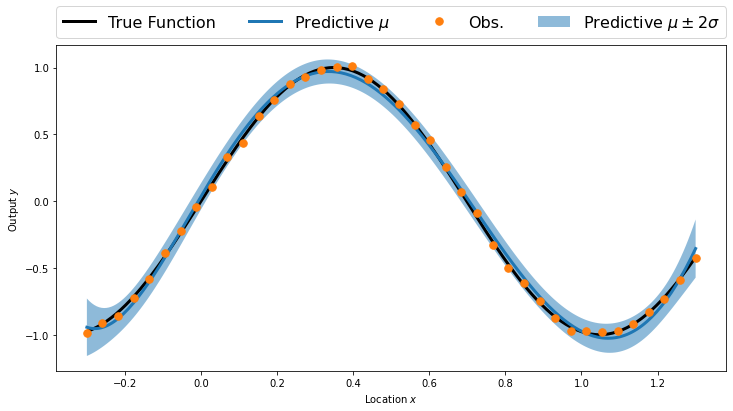

In [ ]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx
         , TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 3 - Comment these results.<br/> -------------------------- </span> 

In case of Posterior Predictive distribution relies on the parameter values obtained from the posterior computation instead of the prior distribution. The predictive posterior distribution gives the distribution range for the target values obtained i.e. based on the new unseen dataset, also taking into consideration all the uncertainty. 

From the above graph which represent the fit of my model on unseen dataset, it can be said that the uncertainity range is small making it a good model.



 



<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 4 - Change the value respectively of  </span> 
    <ul>
       <span style='font-weight:bold;color:red'> <li> the noise level $\sigma^2$$ in the data</li>
        <li>the order of polynoms $k$ </li>
        <li>the number of data samples $N$ </li>
    </span>
    </ul>
   <span style='font-weight:bold;color:red'> Try to understand the impact of each of these values. <br/>
    What could be a measure that could be used to decide between all these different choices (i.e. choice of parameters) ? Implement the computation of such criterion. <br/> -------------------------- </span> 

We can summarize saying that from the above observation we can say that the lesser the noise in the dataset, greater the polynomial order and use of very large dataset should be the cruterion for the bayesian linear regression. 



###the noise level $\sigma^2$ in the data set to 1e-1

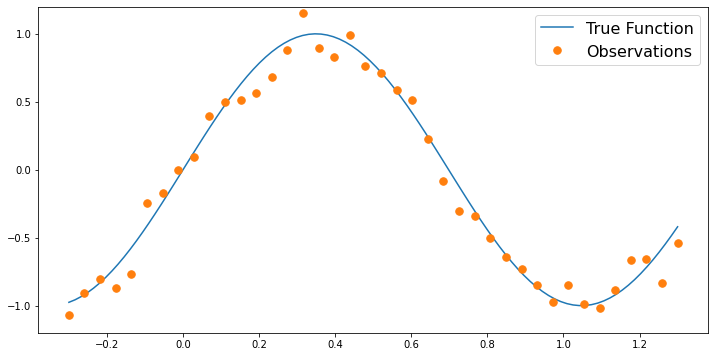

In [ ]:
# Generation of the samples that will constitute our training set
xMin=-0.3
xMax=1.3

numObs = 40   
trueNoiseStd = 1e-1
obsLocs = np.linspace(xMin,xMax,numObs) # choose data points x equally spaced on [xMin;xMax]   

obsData = TrueFunc(obsLocs) + trueNoiseStd*np.random.randn(numObs)      #applied basis function and added noise
modelNoiseStd = trueNoiseStd
noiseCov = modelNoiseStd * np.eye(numObs) # Covariance matrix of the observations     


numPlot = 100

plotx = np.linspace(xMin, xMax, numPlot)

plt.figure(figsize=(12,6))
plt.plot(plotx, TrueFunc(plotx),label='True Function')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Observations')

plt.ylim([-1.2,1.2])
plt.legend(fontsize=16)

It appears that when the value of noise used for observing the observation data is reduced in comparison to the basis function, the uncertainty in the result increases. This will underfit the model but when it is increase there is chance of data being overfit.

##the order of polynoms  changed to $3$

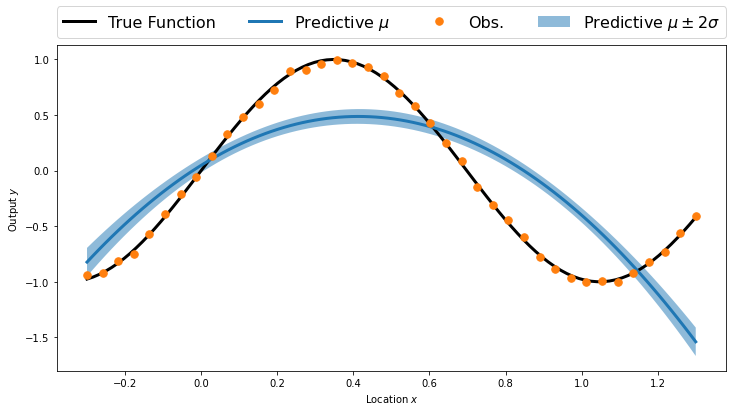

In [ ]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx
         , TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Output $y$')
plt.show()

It is clear that our observation value differs from our true value. When the polyorder is reduced, the model receives very few parameter values for prediction, as the predicted values are the average of the given observation and parameter values, as shown in the above graph, the output values deviate a lot from their observed mean. When the polyorder is increased, the output values are very close to the observed.

##the number of data samples $100$

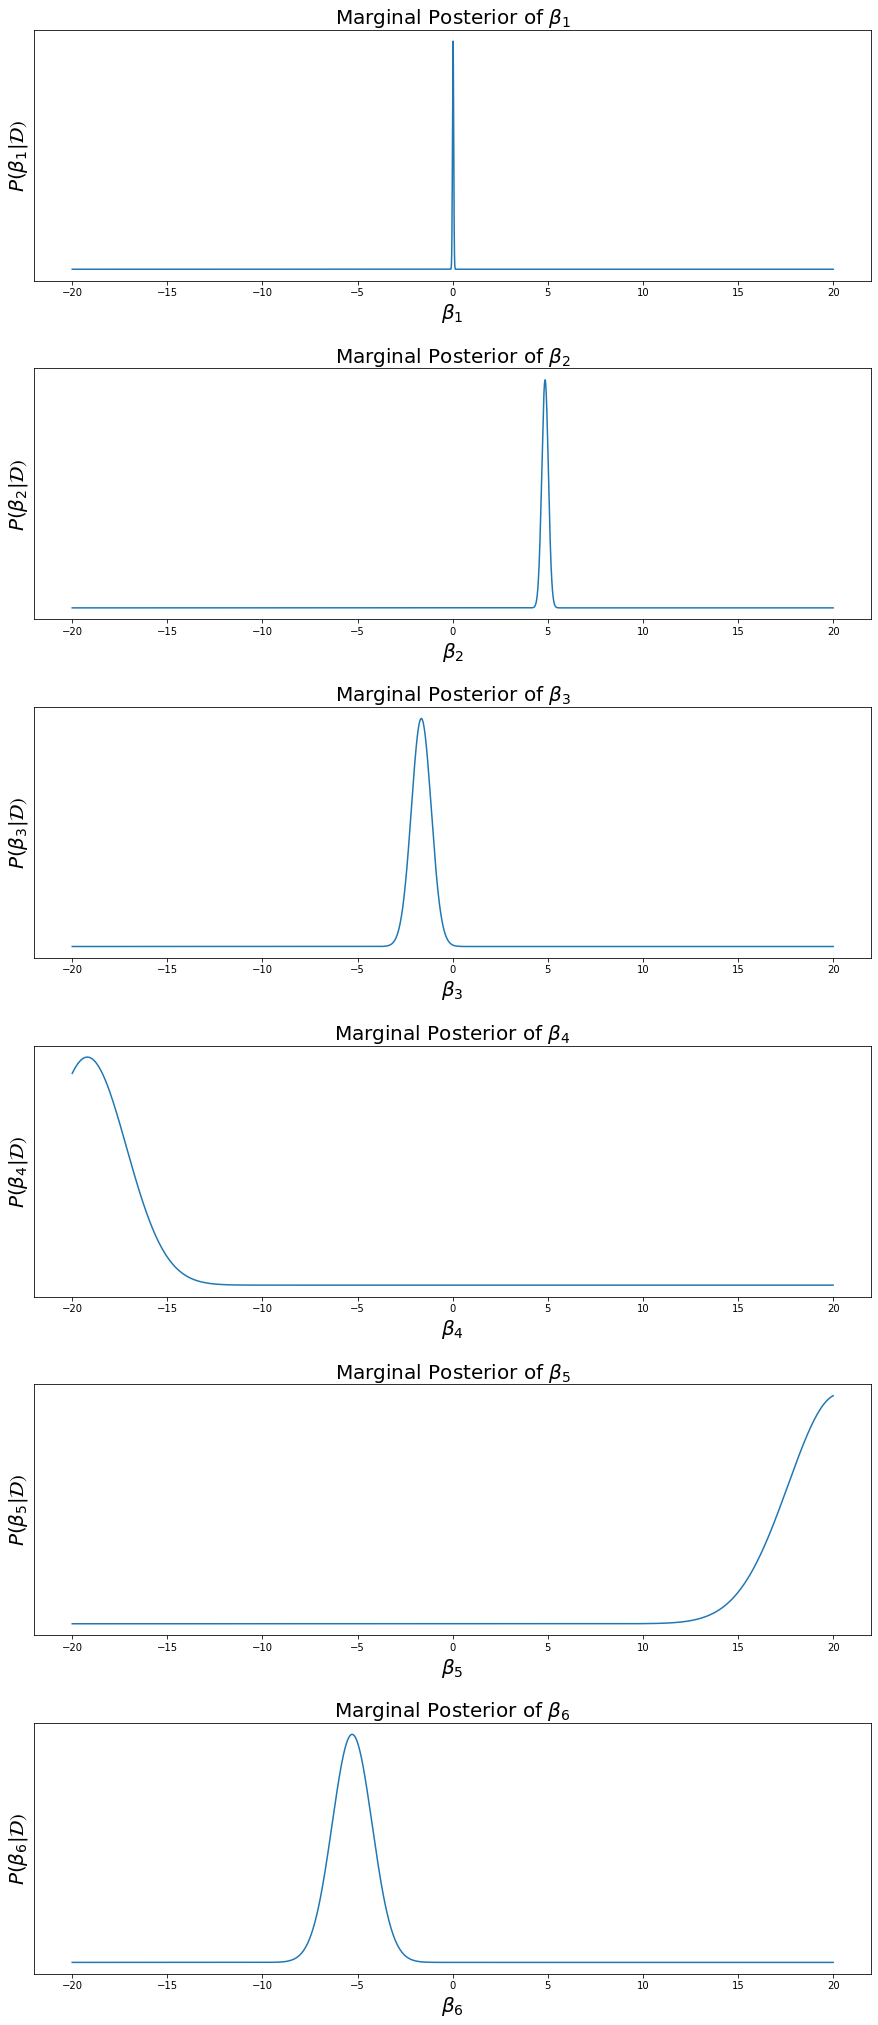

In [ ]:
predCov=np.dot(np.dot(B,priorCov),B.T)+noiseCov
predMean=np.dot(B,priorMean)

ProductK=np.dot(np.dot(priorCov,B.T),np.linalg.inv(predCov))

postMean=priorMean+np.dot(ProductK,(obsData-predMean))
postCov=np.dot((np.eye(polyOrder)-np.dot(ProductK,B)),priorCov)
#print(postMean)
#print(postCov)


BetaGrid = np.linspace(-10, 10, 1000)


fig, axes = plt.subplots(nrows=polyOrder,figsize=(15,15))
fig.tight_layout()#(wspace = 0.2)
for i in range(polyOrder):
    plot_posterior(postMean[i],postCov[i,i],i, ax=axes[i])
    axes[i].set_yticks([])
    

plt.subplots_adjust(left=0.125,
                    bottom=0, 
                    right=0.9, 
                    top=1.8, 
                    wspace=10, 
                    hspace=0.35)    

plt.show()


We notice that the more data we have, the narrower the range of uncertainity. This means that the greater the amount of data we have, the more severely constrained the range of a posteriori plausible parameter values will be. As the number of data points increases, we can see that the pdf curve for the posterior distribution is less informative for several beta parameters. As a result, as data volume grows, it becomes less informative, and vice versa.

What could be a measure that could be used to decide between all these different choices (i.e. choice of parameters) ?<br/> -------------------------- </span> 

We can summarize saying that from the above observation we can say that the lesser the noise in the dataset, greater the polynomial order and use of significant amount of dataset should be the criterion for the bayesian linear regression. 

                                                                          
 Thank You                                                                           

<span style='color:gray;float:right'>----
    *François Septier - Copernicus Master in Digital Earth*</span>